# Assignment: Trees

## Do two questions in total: "Q1+Q2" or "Q1+Q3"

`! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Please answer the following questions in your own words.
1. Why is the Gini a good loss function for categorical target variables?
2. Why do trees tend to overfit, and how can this tendency be constrained?
3. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.
4. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
5. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

In [ ]:
#Clone the assignment
! git clone https://github.com/ds3001f25/linear_models_assignment.git

Cloning into 'linear_models_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 6 (from 1)
Receiving objects: 100% (9/9), 18.05 KiB | 1.39 MiB/s, done.


**Question 1.**
he Gini impurity is a good loss function for categorical target variables because it measures how often a randomly chosen sample would be misclassified if it were labeled according to the class distribution in a node. It works well with categorical data since it directly quantifies class mixing; here, lower values mean purer nodes with clearer class separation.

**Question 2.**
rees tend to overfit because they keep splitting until every leaf fits the training data perfectly, capturing noise rather than general patterns. This tendency can be constrained by setting limits such as maximum depth, minimum samples per leaf, or pruning back branches that do not significantly improve predictive accuracy.

**Question 3.**
False. Trees can handle both categorical and numerical features well. Their strength lies in capturing nonlinear relationships and interactions between variables, not just categorical ones. They partition the data adaptively, so they are flexible across many feature types.

**Question 4.**
Most classification and regression tree algorithms use binary splits (two branches) because they are computationally efficient and easier to interpret. Binary splits also allow trees to explore combinations of variables more flexibly, rather than forcing many-way splits that can fragment the data too much.

**Question 5.**
A tree is probably overfitting if it is very deep, has many small leaves with few samples, or performs much better on training data than on validation data. It is likely underfitting if it is very shallow, has few splits, and shows poor accuracy on both training and validation sets.

**Q2.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q3.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [1]:
#import pandas + upload the file here
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving corporate_ratings.csv to corporate_ratings.csv


In [2]:
#Question 3.1: How many observations and variations?
#read the csv file
df = pd.read_csv('corporate_ratings.csv')

#print out the dimension
print(f"Observations (rows): {df.shape[0]}")
print(f"Variables (columns): {df.shape[1]}")

#display the first couple of rows so we can visualize what is going on
df.head()

Observations (rows): 2029
Variables (columns): 31


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


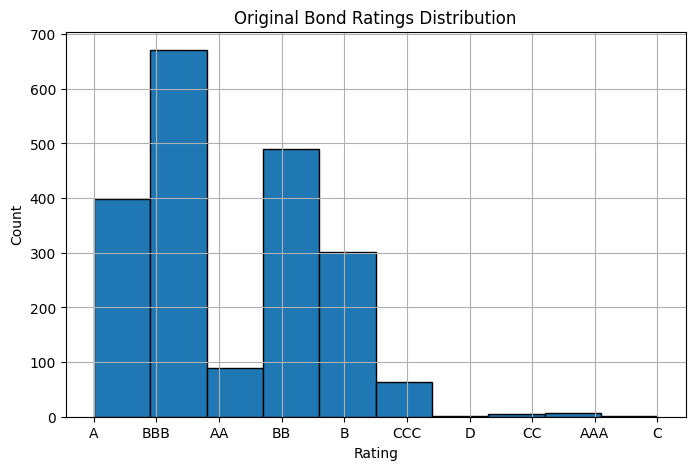

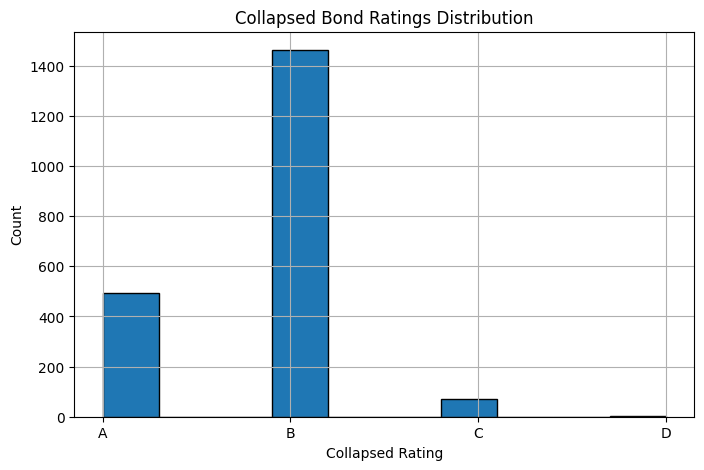

In [4]:
#Question 3.2: Histogram
#import matplotlib for histogram visualization
import matplotlib.pyplot as plt

#plot the original ratings histogram + make it look pretty with labels
plt.figure(figsize=(8,5))
df['Rating'].hist(bins=len(df['Rating'].unique()), edgecolor='black')
plt.title('Original Bond Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#this will collapse the ratings where AAA/AA/A --> A, BBB/BB/B --> B, CCC/CC/C --> C
collapse_map = {
    'AAA': 'A', 'AA': 'A', 'A': 'A',
    'BBB': 'B', 'BB': 'B', 'B': 'B',
    'CCC': 'C', 'CC': 'C', 'C': 'C',
    'D': 'D'
}

#create a data frame of the ratings with collapsed
df['rating_collapsed'] = df['Rating'].map(collapse_map)

#plot the collapsed histogram so we visualize the original and the collapsed plotted against each other + make it pretty!
plt.figure(figsize=(8,5))
df['rating_collapsed'].hist(edgecolor='black')
plt.title('Collapsed Bond Ratings Distribution')
plt.xlabel('Collapsed Rating')
plt.ylabel('Count')
plt.show()

In [5]:
#Question 3.3: Data Matrix

#create a new variable to exclude all of the columns we do not want
exclude_cols = {'Rating', 'rating', 'rating_collapsed', 'Date', 'Name', 'Symbol', 'Rating Agency Name'}

#create a new variable for one-hot encode sector
sector_dummies = pd.get_dummies(df['Sector'], prefix='Sector') if 'Sector' in df.columns else pd.DataFrame(index=df.index)

#create a variable to keep all remaining numeric/boolean columns except the excluded ones
base_feats = df.drop(columns=[c for c in exclude_cols if c in df.columns] + (['Sector'] if 'Sector' in df.columns else []))
base_feats = base_feats.select_dtypes(include=['number', 'bool'])

#Combine this all into one singular variable called 'X'
X = pd.concat([base_feats.reset_index(drop=True),
               sector_dummies.reset_index(drop=True)], axis=1)

#print 'X' shape + visualize it
print("X shape:", X.shape)
X.head()

X shape: (2029, 37)


,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Sector_Consumer Durables,Sector_Consumer Non-Durables,Sector_Consumer Services,Sector_Energy,Sector_Finance,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,Sector_Technology,Sector_Transportation
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,True,False,False,False,False,False,False,False,False,False
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,True,False,False,False,False,False,False,False,False,False
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,True,False,False,False,False,False,False,False,False,False
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,True,False,False,False,False,False,False,False,False,False
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,True,False,False,False,False,False,False,False,False,False


Accuracy: 0.742


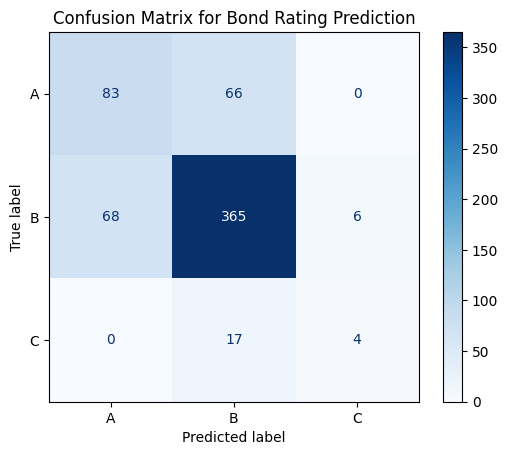

In [7]:
#Question 3.4: Confusion Matrix
#we will need the following packages
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Define target (collapsed ratings) and features (X)
y = df['rating_collapsed']

#These will remove rows where the collapsed rating is 'D' as it has only one sample
df_filtered = df[df['rating_collapsed'] != 'D'].copy()
X_filtered = X[df['rating_collapsed'] != 'D'].copy()
y_filtered = df_filtered['rating_collapsed']

#Here we will split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42, stratify=y_filtered)

#'clf' will create and fit Decision Tree model
clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=10)
clf.fit(X_train, y_train)

#predict the test set
y_pred = clf.predict(X_test)

#evaluate and print the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

#This will create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Bond Rating Prediction")
plt.show()

**Question 3.4:**
An accuracy of 0.742 means the tree correctly predicts about 74.2% of ratings in the test set. That suggests the model is capturing meaningful patterns in the business fundamentals. In addition, based on the generated Confusion Matrix, it shows that the model performs well overall but is somewhat biased toward predicting the majority class, B. Most B-rated companies are correctly classified (365), while a large portion of A and C ratings are misclassified as B. Essentially, it recognizes whether a company is roughly high-, mid-, or low-quality but has difficulty separating close credit tiers.

Accuracy WITHOUT agency: 0.742
Accuracy WITH agency:    0.754


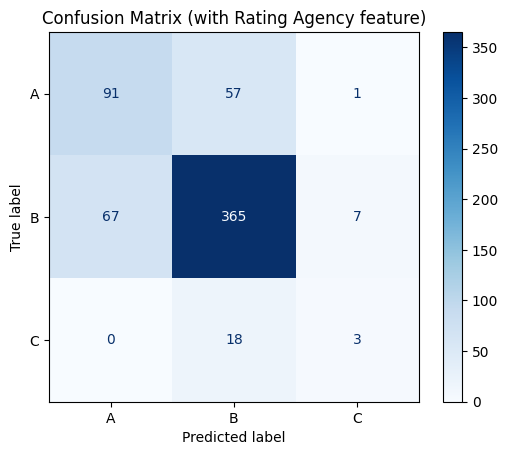

In [10]:
#Question 3.5: How do the results change?

#here we will use our collapsed target
y = df['rating_collapsed']

#remove rows where the collapsed rating is 'D' as it has only one sample
df_filtered = df[df['rating_collapsed'] != 'D'].copy()
X_filtered = X[df['rating_collapsed'] != 'D'].copy()
y_filtered = df_filtered['rating_collapsed']

#one-hot rating encode rating agency and append to features
if 'Rating Agency Name' in df_filtered.columns: # Use df_filtered here
    agency_dummies = pd.get_dummies(df_filtered['Rating Agency Name'], prefix='Agency')
else:
    agency_dummies = pd.DataFrame(index=df_filtered.index)

#this will concatenate without resetting index
X_with_agency = pd.concat([X_filtered, agency_dummies], axis=1)


#this will make a single index split to keep apples-to-apples comparison
idx_train, idx_test = train_test_split(df_filtered.index, test_size=0.30, random_state=42, stratify=y_filtered) # Use y_filtered here

X_tr,  X_te  = X_filtered.loc[idx_train], X_filtered.loc[idx_test] # Use X_filtered here
Xag_tr, Xag_te = X_with_agency.loc[idx_train], X_with_agency.loc[idx_test]
y_tr,  y_te  = y_filtered.loc[idx_train], y_filtered.loc[idx_test] # Use y_filtered here


#Model WITHOUT agency
clf_no_ag = DecisionTreeClassifier(random_state=42, min_samples_leaf=10)
clf_no_ag.fit(X_tr, y_tr)
pred_no_ag = clf_no_ag.predict(X_te)
acc_no_ag = accuracy_score(y_te, pred_no_ag)

#Model WITH agency
clf_ag = DecisionTreeClassifier(random_state=42, min_samples_leaf=10)
clf_ag.fit(Xag_tr, y_tr)
pred_ag = clf_ag.predict(Xag_te)
acc_ag = accuracy_score(y_te, pred_ag)

#print this out
print(f"Accuracy WITHOUT agency: {acc_no_ag:.3f}")
print(f"Accuracy WITH agency:    {acc_ag:.3f}")

#Confusion matrix for the WITH-agency model
cm = confusion_matrix(y_te, pred_ag, labels=clf_ag.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_ag.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (with Rating Agency feature)")
plt.show()

**Question 3.5**

Including the rating agency as a predictor slightly improved accuracy from 0.742 to 0.754, meaning the model gained a small edge in prediction. The confusion matrix shows only minor shifts, with a few more A ratings correctly classified and marginally fewer misclassifications overall. This suggests that different agencies have slightly distinct rating patterns.

However, this improvement reflects the model’s ability to capture agency-specific bias rather than a deeper understanding of company fundamentals. In other words, the model now predicts ratings a bit better because it knows who issued the rating, not necessarily because it better understands why the rating was given.